In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import sys
sys.path.append('../')
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("../data/data_train.csv")
df_train

,Ball_Possession_Home_local,Ball_Possession_Away_visitante,Shots_on_Goal_Home_local,Shots_on_Goal_Away_visitante,Fouls_Home_local,Fouls_Away_visitante,Yellow_Cards_Home_local,Yellow_Cards_Away_visitante,Red_Cards_Home_local,Red_Cards_Away_visitante,...,expected_goals_xg_away_visitante,Goalkeeper_Saves_Home_local,Goalkeeper_Saves_Away_visitante,Offsides_Home_local,Offsides_Away_visitante,Total_Passes_Home_local,Total_Passes_Away_visitante,save_ratio_home_local,save_ratio_away_visitante,resultado
0,51.0,49.0,8.0,0.0,8.0,11.0,0.0,0.0,0.0,0.0,...,0.51,0.0,3.0,1.0,0.0,456.0,432.0,0.000000,0.375000,0
1,41.0,59.0,5.0,4.0,15.0,16.0,4.0,4.0,0.0,0.0,...,1.56,3.0,3.0,0.0,6.0,283.0,427.0,0.750000,0.600000,0
2,34.0,66.0,4.0,3.0,12.0,8.0,4.0,0.0,0.0,0.0,...,0.60,3.0,3.0,3.0,0.0,323.0,635.0,1.000000,0.750000,0
3,65.0,35.0,5.0,4.0,9.0,11.0,0.0,0.0,0.0,0.0,...,1.50,3.0,4.0,2.0,1.0,593.0,329.0,0.750000,0.800000,1
4,66.0,34.0,3.0,4.0,9.0,13.0,0.0,2.0,0.0,0.0,...,0.46,3.0,2.0,2.0,2.0,538.0,276.0,0.750000,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8895,71.0,29.0,12.0,3.0,11.0,12.0,2.0,2.0,0.0,0.0,...,1.26,2.0,8.0,2.0,3.0,605.0,234.0,0.666667,0.666667,0
8896,41.0,59.0,9.0,2.0,12.0,6.0,0.0,2.0,0.0,0.0,...,1.56,1.0,9.0,6.0,3.0,366.0,556.0,0.500000,1.000000,2
8897,33.0,67.0,1.0,8.0,18.0,11.0,3.0,0.0,0.0,0.0,...,1.58,7.0,1.0,2.0,2.0,262.0,562.0,0.875000,1.000000,2
8898,79.0,21.0,7.0,2.0,12.0,12.0,2.0,2.0,0.0,0.0,...,1.12,1.0,5.0,2.0,1.0,769.0,200.0,0.500000,0.714286,0


In [4]:
df_test_model = pd.read_csv("../data/data_test.csv")
df_test_model

,resultado,Ball_Possession_Home_local,Shots_on_Goal_Home_local,Fouls_Home_local,Yellow_Cards_Home_local,Red_Cards_Home_local,expected_goals_xg_home_local,Goalkeeper_Saves_Home_local,Offsides_Home_local,Total_Passes_Home_local,...,Ball_Possession_Away_visitante,Shots_on_Goal_Away_visitante,Fouls_Away_visitante,Yellow_Cards_Away_visitante,Red_Cards_Away_visitante,expected_goals_xg_away_visitante,Goalkeeper_Saves_Away_visitante,Offsides_Away_visitante,Total_Passes_Away_visitante,save_ratio_away_visitante
0,0,59.552573,6.000000,4.487696,0.664430,0.029083,2.389933,2.760626,0.970917,546.713647,...,39.666667,3.000000,13.111111,2.666667,0.000000,1.013333,4.111111,2.222222,355.666667,0.674868
1,2,45.770833,4.625000,9.604167,1.666667,0.083333,1.503333,2.979167,1.708333,392.125000,...,48.000000,5.100000,10.000000,2.300000,0.000000,1.420000,4.700000,1.800000,437.900000,0.676429
2,2,52.822581,4.419355,11.024194,1.701613,0.048387,1.865242,2.508065,2.016129,482.040323,...,46.800000,4.600000,11.900000,2.400000,0.000000,1.338000,4.300000,1.800000,447.500000,0.644643
3,2,43.592593,3.654321,9.098765,1.419753,0.006173,1.089630,3.092593,2.277778,370.561728,...,44.222222,4.555556,11.777778,2.222222,0.000000,1.282222,2.444444,1.555556,399.222222,0.576455
4,0,60.128668,5.975169,4.600451,0.683973,0.022573,1.923747,2.616253,0.984199,591.882619,...,41.800000,4.200000,14.200000,2.400000,0.100000,1.496000,4.000000,2.100000,350.400000,0.677778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0,50.221154,4.060897,2.875000,0.480769,0.016026,1.265545,2.788462,0.583333,467.035256,...,56.200000,6.100000,10.400000,1.200000,0.000000,1.908000,1.300000,2.000000,560.600000,0.616667
185,0,57.404063,5.934537,4.832957,0.731377,0.015801,1.683747,2.636569,0.866817,545.176072,...,41.800000,4.200000,14.200000,2.400000,0.100000,1.496000,4.000000,2.100000,350.400000,0.677778
186,0,38.785714,3.678571,11.642857,2.392857,0.071429,1.117500,2.785714,1.928571,342.821429,...,46.800000,4.600000,11.900000,2.400000,0.000000,1.338000,4.300000,1.800000,447.500000,0.644643
187,0,48.162371,4.090206,4.005155,0.677835,0.025773,1.571933,2.757732,0.551546,415.368557,...,41.700000,4.300000,12.600000,2.500000,0.500000,1.000000,5.600000,2.200000,367.500000,0.662112


In [ ]:
''' 
Cargamos el dataset final que guardamos en el Feature Engineering, 
antes de dividirlo en los 2 dataset de arriba.

'''

df = pd.read_csv("../data/data_final.csv")
df

,Ball_Possession_Home,Ball_Possession_Away,Shots_on_Goal_Home,Shots_on_Goal_Away,Fouls_Home,Fouls_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,...,Total_Passes_Away,save_ratio_home,save_ratio_away,League,home_team,away_team,season_year,home_score,away_score,resultado
0,69.0,31.0,5.0,2.0,8.0,11.0,4.0,3.0,0.0,0.0,...,298.0,0.500000,0.600000,Premier-league,Arsenal,Everton,2023/2024,2,1,0
1,54.0,46.0,5.0,7.0,15.0,11.0,4.0,4.0,0.0,0.0,...,393.0,0.428571,0.600000,Premier-league,Brentford,Newcastle,2023/2024,2,4,2
2,56.0,44.0,3.0,4.0,10.0,9.0,1.0,3.0,0.0,0.0,...,460.0,0.500000,1.000000,Premier-league,Brighton,Manchester Utd,2023/2024,0,2,2
3,69.0,31.0,3.0,6.0,11.0,5.0,1.0,0.0,0.0,0.0,...,242.0,0.666667,0.666667,Premier-league,Burnley,Nottingham,2023/2024,1,2,2
4,63.0,37.0,6.0,5.0,5.0,9.0,2.0,3.0,0.0,0.0,...,319.0,0.800000,0.666667,Premier-league,Chelsea,Bournemouth,2023/2024,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,54.0,47.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,401.0,1.000000,0.500000,Premier-league,Leeds,Everton,2000/2001,2,0,0
9085,50.0,46.5,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,394.0,1.000000,1.000000,Premier-league,Leicester,Aston Villa,2000/2001,0,0,1
9086,63.0,49.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,432.0,1.000000,0.857143,Premier-league,Liverpool,Bradford City,2000/2001,1,0,0
9087,45.0,57.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,538.5,1.000000,0.666667,Premier-league,Sunderland,Arsenal,2000/2001,1,0,0


In [ ]:
# Dividimos los dataset en train y test manualmente.

X_test = df_test_model.drop(columns=['resultado'])
y_test = df_test_model['resultado']
X_train = df_train.drop(columns=['resultado'])
y_train = df_train['resultado']


In [ ]:
# Igualamos el orden de las columas de ambos dataset para que no den errores los modelos

X_test = df_test_model[X_train.columns]

# Random Forest Clasico

In [ ]:
# Creamos y entrenamos el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Predicciones
y_pred = modelo_rf.predict(X_test)

In [9]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.582010582010582
F1 Score (macro): 0.5443118264254854

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        86
           1       0.41      0.35      0.38        46
           2       0.54      0.58      0.56        57

    accuracy                           0.58       189
   macro avg       0.55      0.55      0.54       189
weighted avg       0.57      0.58      0.58       189



In [10]:
# ROC AUC Multiclase
classes = [0, 1, 2]
y_proba_test = modelo_rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes)
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.732222695932342


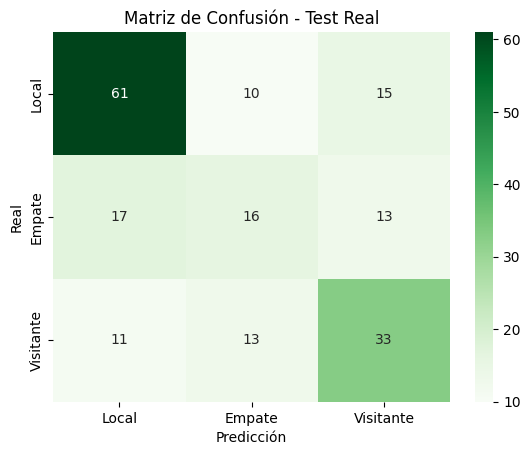

In [11]:
# Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Test Real')
plt.show()

# Random Forest Tuneado

In [12]:
# Parámetros a tunear
tuned_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [3,5,7],
    # 'class_weight': [None, 'balanced']
}

In [13]:
# Grid Search con 5-Fold Cross Validation
modelo_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo_base,
                           param_grid=tuned_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro', verbose=1)

In [14]:
# Mejor modelo encontrado
mejor_rf = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 300}


In [15]:
# Predicciones con el modelo tunedo
y_pred = mejor_rf.predict(X_test)

In [ ]:
# Evaluación en entrenamiento del RF Tuneado
y_train_pred = mejor_rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))


NameError: name 'mejor_rf' is not defined

In [ ]:
# Evaluación en test RF Tuneado
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.582010582010582
F1 Score (macro): 0.5242673196735973

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        86
           1       0.45      0.22      0.29        46
           2       0.54      0.68      0.60        57

    accuracy                           0.58       189
   macro avg       0.55      0.54      0.52       189
weighted avg       0.57      0.58      0.56       189



In [ ]:
# ROC AUC Multiclase RF Tuneado
y_proba_test = mejor_rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.7451160481889922


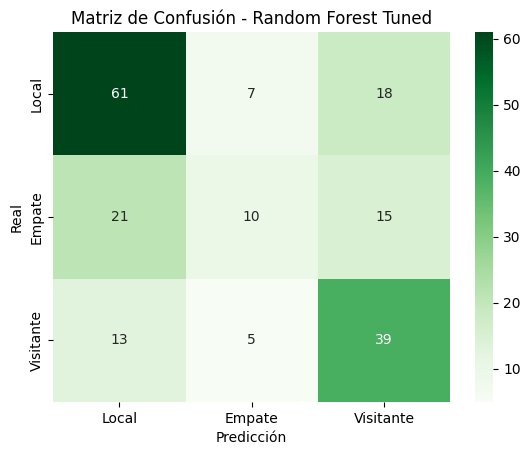

In [ ]:
# Matriz de confusión RF Tuneado
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Tuned')
plt.show()

### RF tuneado con Balanced

In [20]:
tuned_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [3,5,7],
    'class_weight': [None, 'balanced']
}

In [58]:
# Grid Search con 5-Fold Cross Validation
modelo_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo_base,
                           param_grid=tuned_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro', verbose=1)

In [59]:
# Mejor modelo encontrado
mejor_rf = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 100}


In [60]:
# Predicciones con el modelo tunedo
y_pred = mejor_rf.predict(X_test)

In [ ]:
# Evaluación en entrenamiento RF Balanced
y_train_pred = mejor_rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.9721348314606741
Train F1 Score (macro): 0.9691603085162851

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4092
           1       0.94      0.96      0.95      2204
           2       0.97      0.98      0.97      2604

    accuracy                           0.97      8900
   macro avg       0.97      0.97      0.97      8900
weighted avg       0.97      0.97      0.97      8900



In [ ]:
# Evaluación en test RF Balanced
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5661375661375662
F1 Score (macro): 0.529727751158707

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        86
           1       0.38      0.33      0.35        46
           2       0.53      0.60      0.56        57

    accuracy                           0.57       189
   macro avg       0.53      0.53      0.53       189
weighted avg       0.56      0.57      0.56       189



In [ ]:
# ROC AUC Multiclase RF Balanced
y_proba_test = mejor_rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.7402105642305842


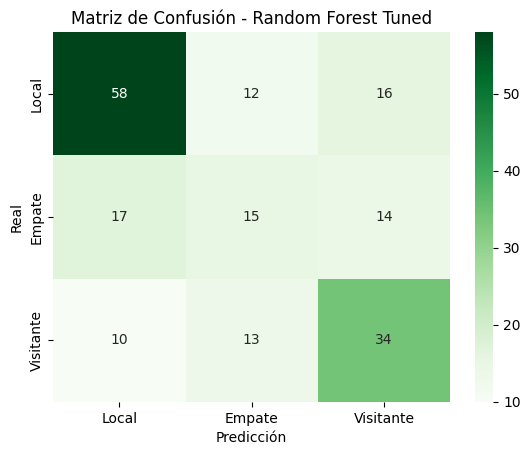

In [ ]:
# Matriz de confusión RF Balanced
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Tuned')
plt.show()

 #### **Aca ya vimos el serio problema que tenemos de Overfitting, así que vamos a intentar encontrar el motivo**

## Tratar Overfitting

In [ ]:
tuned_params = {
    'n_estimators': [50, 75, 150],
    'max_depth': [3, 4],               # Limitar aún más la profundidad
    'min_samples_split': [20, 30],    # Evita splits
    'min_samples_leaf': [15, 30],         # No hojas con pocos ejemplos
    'max_features': ['sqrt', 'log2'],     # Reducir el número de features en cada split
    # 'class_weight': ['balanced']          # Balancear clases
}


In [22]:
# Grid Search con 5-Fold Cross Validation
modelo_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo_base,
                           param_grid=tuned_params,
                           scoring='f1_macro',
                           cv=10,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [15, 30],
                         'min_samples_split': [20, 30],
                         'n_estimators': [50, 75, 150]},
             scoring='f1_macro', verbose=1)

In [23]:
# Mejor modelo encontrado
mejor_rf = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 150}


In [24]:
# Predicciones con el modelo tunedo
y_pred = mejor_rf.predict(X_test)

In [25]:
# Evaluación en entrenamiento
y_train_pred = mejor_rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))


Train Accuracy: 0.8020224719101123
Train F1 Score (macro): 0.751597043508977

Train Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      4092
           1       1.00      0.36      0.53      2204
           2       0.88      0.88      0.88      2604

    accuracy                           0.80      8900
   macro avg       0.87      0.74      0.75      8900
weighted avg       0.84      0.80      0.78      8900



In [ ]:
# Evaluación en test
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5502645502645502
F1 Score (macro): 0.4108657019548108

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.66        86
           1       0.00      0.00      0.00        46
           2       0.51      0.65      0.57        57

    accuracy                           0.55       189
   macro avg       0.36      0.48      0.41       189
weighted avg       0.42      0.55      0.47       189



In [27]:
# ROC AUC Multiclase
y_proba_test = mejor_rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.726555463219705


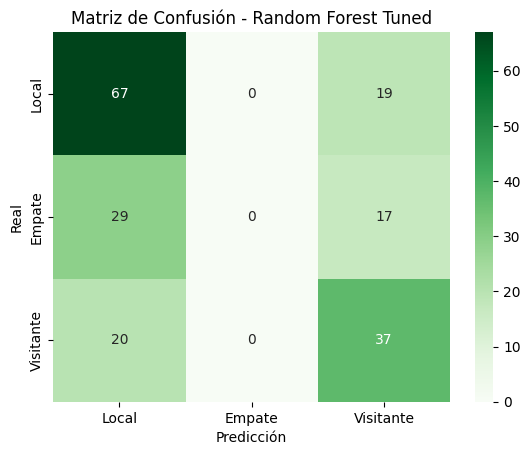

In [28]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Tuned')
plt.show()

Distribución en y_train:
resultado
0    4092
2    2604
1    2204
Name: count, dtype: int64

Distribución en y_test:
resultado
0    86
2    57
1    46
Name: count, dtype: int64


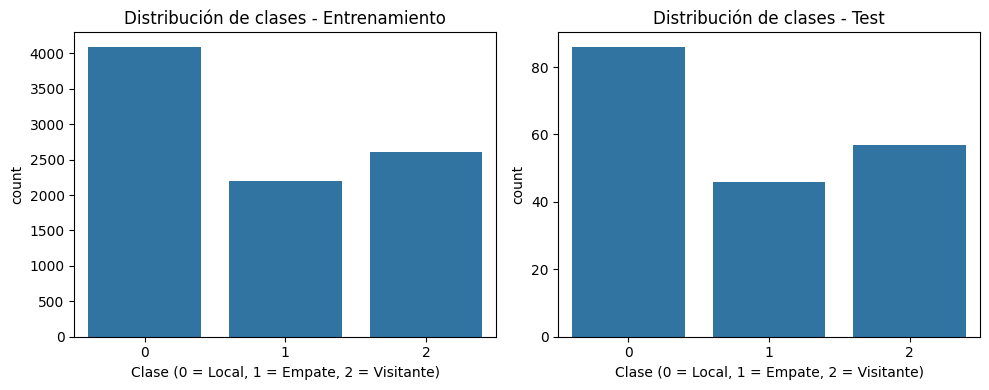

In [ ]:
'''
Dado lo mal que salio la primera prueba para tratar el Overfitting
Vamos a mirar la distribucion del target

'''
# Conteo de clases
print("Distribución en y_train:")
print(y_train.value_counts())

print("\nDistribución en y_test:")
print(y_test.value_counts())

# Gráfico
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribución de clases - Entrenamiento')
plt.xlabel('Clase (0 = Local, 1 = Empate, 2 = Visitante)')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Distribución de clases - Test')
plt.xlabel('Clase (0 = Local, 1 = Empate, 2 = Visitante)')

plt.tight_layout()
plt.show()


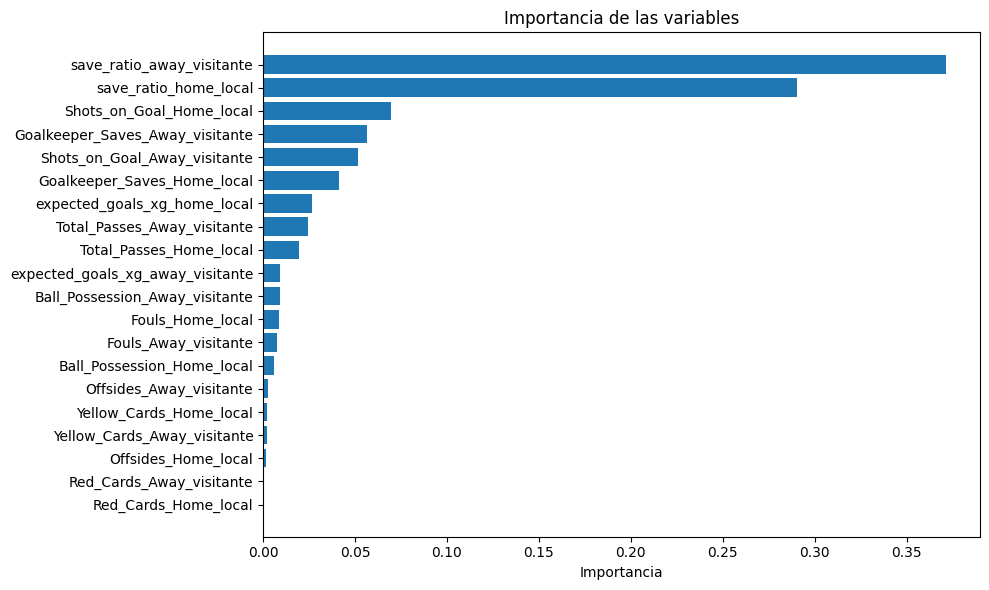

In [ ]:
''' 
Tambien vamos a ver que features toma como importantes el modelo

'''

# Obtenemos las importancias
importancias = mejor_rf.feature_importances_

# Nombres de las columnas (features)
feature_names = X_train.columns

# Ordenamos por importancia descendente
sorted_idx = importancias.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(importancias)), importancias[sorted_idx])
plt.yticks(range(len(importancias)), feature_names[sorted_idx])
plt.gca().invert_yaxis()
plt.title("Importancia de las variables")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()



#### Cross validation score

In [ ]:
# Vamos a probar con un Cross validation score

# Para ello definimos las variables y asi podemos dividir todo el dataset df (cargado arriba) en X e Y

features = ['Ball_Possession_Home', 'Ball_Possession_Away', 'Shots_on_Goal_Home', 'Shots_on_Goal_Away',
    'Fouls_Home', 'Fouls_Away', 'Yellow_Cards_Home', 'Yellow_Cards_Away', 'Red_Cards_Home', 'Red_Cards_Away',
    'expected_goals_xg_home', 'expected_goals_xg_away', 'Goalkeeper_Saves_Home', 'Goalkeeper_Saves_Away',
    'Offsides_Home', 'Offsides_Away', 'Total_Passes_Home', 'Total_Passes_Away',
    'save_ratio_home', 'save_ratio_away']

In [ ]:
# Definimos tus features (X) y tu objetivo (y)

X = df[features]  # lista de columnas que usamos para entrenar
y = df['resultado']  # la variable objetivo

# Definimos tu modelo

modelo = RandomForestClassifier(random_state=42)

# Validación cruzada sobre todo el dataset

scores = cross_val_score(modelo, X, y, cv=5, scoring='f1_macro', n_jobs=-1)

# Resultados

print("F1 Macro por fold:", scores)
print("F1 Macro promedio:", scores.mean())
print("F1 Macro desviación estándar:", scores.std())


F1 Macro por fold: [0.87213168 0.90361364 0.9352577  0.95217798 0.97845119]
F1 Macro promedio: 0.9283264394719609
F1 Macro desviación estándar: 0.0371429750902354


In [ ]:
# Miramos la distribución en train vs test

print("Distribución en TRAIN:")
print(df_train['resultado'].value_counts(normalize=True))

print("\nDistribución en TEST:")
print(df_test_model['resultado'].value_counts(normalize=True))


Distribución en TRAIN:
resultado
0    0.459775
2    0.292584
1    0.247640
Name: proportion, dtype: float64

Distribución en TEST:
resultado
0    0.455026
2    0.301587
1    0.243386
Name: proportion, dtype: float64


In [ ]:
'''
Miramos la media de las variables mas importantes para el modelo
Para ver si hay una variacion muy grande en este aspecto
Ya que arriba vemos que en el target no la hay

'''
features_importantes = ['save_ratio_away_visitante',
    'save_ratio_home_local',
    'Shots_on_Goal_Home_local',
    'Shots_on_Goal_Away_visitante']

print("Media por feature en TRAIN:")
print(df_train[features_importantes].mean())

print("\nMedia por feature en TEST:")
print(df_test_model[features_importantes].mean())


Media por feature en TRAIN:
save_ratio_away_visitante       0.651028
save_ratio_home_local           0.674323
Shots_on_Goal_Home_local        4.562640
Shots_on_Goal_Away_visitante    3.779888
dtype: float64

Media por feature en TEST:
save_ratio_away_visitante       0.661338
save_ratio_home_local           0.676388
Shots_on_Goal_Home_local        4.644840
Shots_on_Goal_Away_visitante    4.693122
dtype: float64


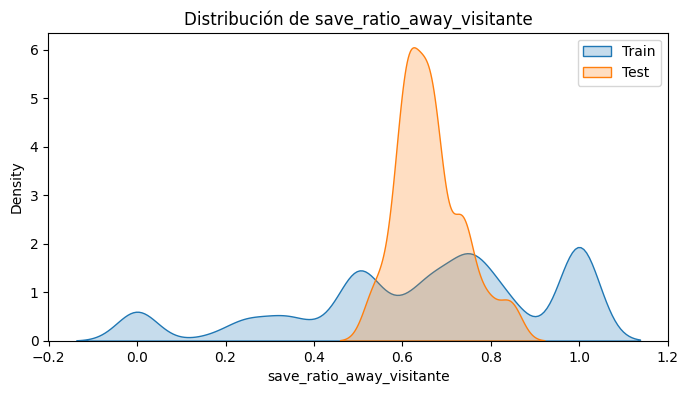

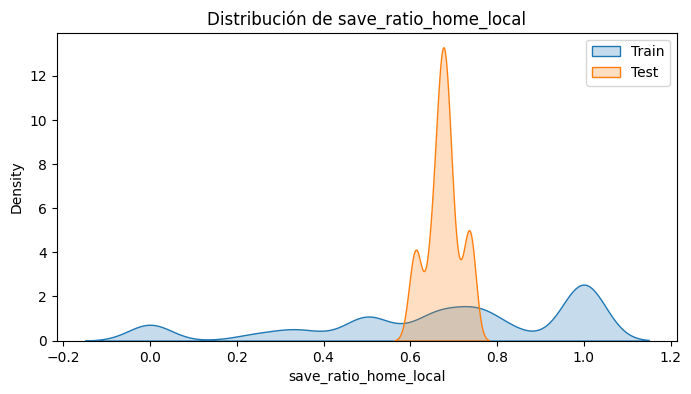

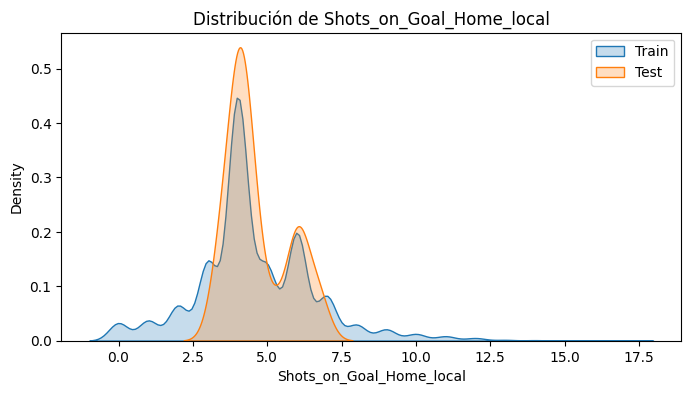

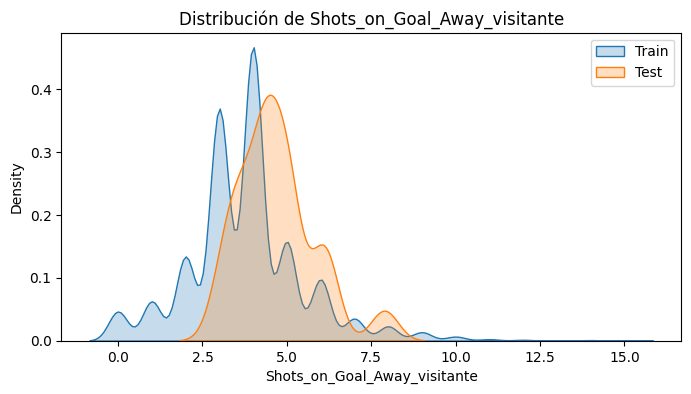

In [ ]:
# Graficamos para que sea mas visual

for feature in features_importantes:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_train[feature], label='Train', fill=True)
    sns.kdeplot(df_test_model[feature], label='Test', fill=True)
    plt.title(f"Distribución de {feature}")
    plt.legend()
    plt.show()


#### ***Encontramos algo interesante justamente en las 2 variables mas importantes para el dataset***

### Eliminar features

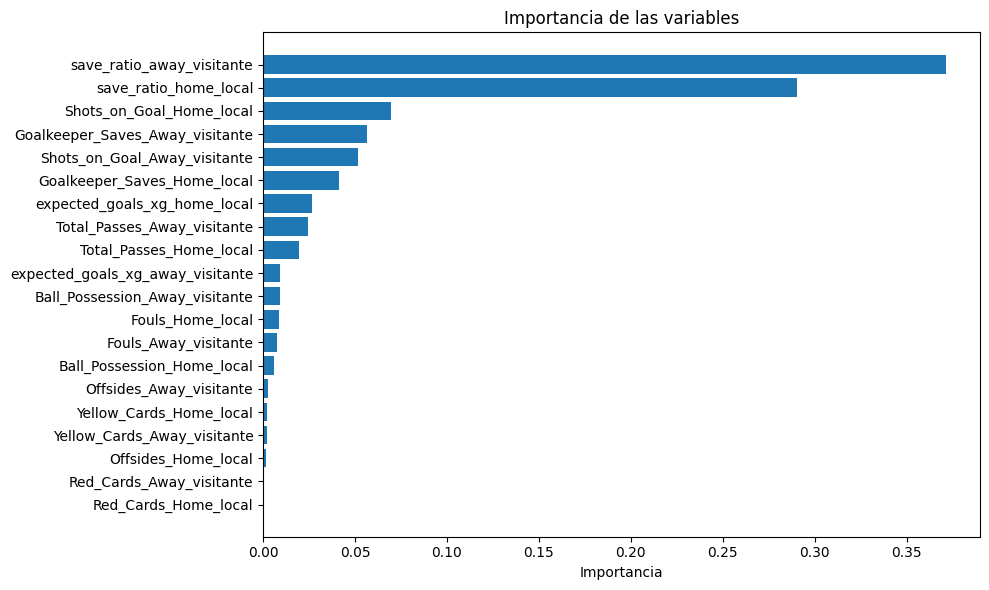

In [ ]:
# Obtenemos las importancias
importancias = mejor_rf.feature_importances_

# Nombres de las columnas (features)
feature_names = X_train.columns

# Ordenamos por importancia descendente
sorted_idx = importancias.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(importancias)), importancias[sorted_idx])
plt.yticks(range(len(importancias)), feature_names[sorted_idx])
plt.gca().invert_yaxis()
plt.title("Importancia de las variables")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()



### Eliminamos las features mas importantes

In [ ]:
'''
Probamos con eliminar esas variables importantes y ver como se comporta el modelo

'''

# Eliminar features del dataframe original
features_to_remove = [
    'save_ratio_away_visitante',
    'save_ratio_home_local',
    'Shots_on_Goal_Home_local',
    'Goalkeeper_Saves_Away_visitante'
]

df_train = df_train.drop(columns=features_to_remove)
df_test_model = df_test_model.drop(columns=features_to_remove)


In [ ]:
# Volvemos a definir X e Y

X_test = df_test_model.drop(columns=['resultado'])
y_test = df_test_model['resultado']
X_train = df_train.drop(columns=['resultado'])
y_train = df_train['resultado']

In [ ]:
# Volvemos a igualas los nombres de las columnas, por si acaso.

X_test = df_test_model[X_train.columns]

In [ ]:
# Parámetros a tunear (usamos lo parametros mas flexibles de los que vimos arriba)
tuned_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [3,5,7],
    #'class_weight': [None, 'balanced']
}

In [41]:
# Grid Search con 5-Fold Cross Validation
modelo_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo_base,
                           param_grid=tuned_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro', verbose=1)

In [42]:
# Mejor modelo encontrado
mejor_rf = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [43]:
# Predicciones con el modelo tunedo
y_pred = mejor_rf.predict(X_test)

In [44]:
# Evaluación en entrenamiento
y_train_pred = mejor_rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))


Train Accuracy: 0.6884269662921348
Train F1 Score (macro): 0.5860508849193128

Train Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77      4092
           1       0.85      0.14      0.24      2204
           2       0.73      0.78      0.75      2604

    accuracy                           0.69      8900
   macro avg       0.75      0.61      0.59      8900
weighted avg       0.73      0.69      0.63      8900



In [45]:
# Evaluación en test
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5343915343915344
F1 Score (macro): 0.4101237404708849

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.74      0.65        86
           1       1.00      0.02      0.04        46
           2       0.47      0.63      0.54        57

    accuracy                           0.53       189
   macro avg       0.68      0.47      0.41       189
weighted avg       0.65      0.53      0.47       189



In [46]:
# ROC AUC Multiclase
y_proba_test = mejor_rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.6669485196515798


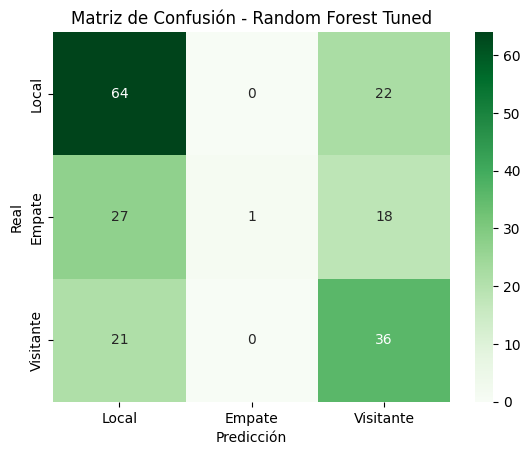

In [47]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Tuned')
plt.show()

### Eliminamos las features menos importantes

In [ ]:
'''
Volvemos a cargar los datasets para restaurar las columas eliminadas
Y vamos a probr ahora eliminando las columas que el modelo no utiliza.

'''

df_train = pd.read_csv("../data/data_train.csv")

df_test_model = pd.read_csv("../data/data_test.csv")

In [50]:
# Eliminar features del dataframe original
features_to_remove = [
    'Yellow_Cards_Home_local',
    'Yellow_Cards_Away_visitante',
    'Red_Cards_Home_local',
    'Red_Cards_Away_visitante',
    'Offsides_Home_local',
    'Offsides_Away_visitante'
]

df_train = df_train.drop(columns=features_to_remove)
df_test_model = df_test_model.drop(columns=features_to_remove)


In [51]:
X_test = df_test_model.drop(columns=['resultado'])
y_test = df_test_model['resultado']
X_train = df_train.drop(columns=['resultado'])
y_train = df_train['resultado']

In [52]:
X_test = df_test_model[X_train.columns]

In [53]:
# Parámetros a tunear
tuned_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [3,5,7],
    #'class_weight': [None, 'balanced']
}

In [54]:
# Grid Search con 5-Fold Cross Validation
modelo_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo_base,
                           param_grid=tuned_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro', verbose=1)

In [55]:
# Mejor modelo encontrado
mejor_rf = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [56]:
# Predicciones con el modelo tunedo
y_pred = mejor_rf.predict(X_test)

In [57]:
# Evaluación en entrenamiento
y_train_pred = mejor_rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))


Train Accuracy: 0.9675280898876405
Train F1 Score (macro): 0.9636331190524715

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4092
           1       0.98      0.90      0.94      2204
           2       0.96      0.98      0.97      2604

    accuracy                           0.97      8900
   macro avg       0.97      0.96      0.96      8900
weighted avg       0.97      0.97      0.97      8900



In [58]:
# Evaluación en test
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5661375661375662
F1 Score (macro): 0.516969696969697

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67        86
           1       0.38      0.24      0.29        46
           2       0.52      0.68      0.59        57

    accuracy                           0.57       189
   macro avg       0.52      0.53      0.52       189
weighted avg       0.55      0.57      0.55       189



In [59]:
# ROC AUC Multiclase
y_proba_test = mejor_rf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.7266390419493046


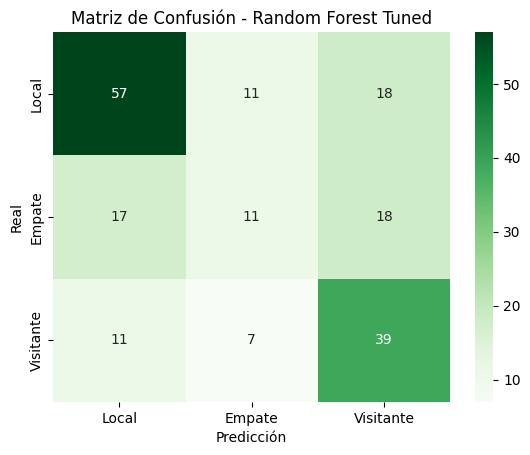

In [60]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Tuned')
plt.show()

### Escalamos variables

In [ ]:
'''
Repetimos el proceso de arriba
Esta vez para probar con un Standar Scaler
Porque tampoco nos convencian los resultados eliminando features

'''

df_train = pd.read_csv("../data/data_train.csv")

df_test_model = pd.read_csv("../data/data_test.csv")

In [7]:
X_test = df_test_model.drop(columns=['resultado'])
y_test = df_test_model['resultado']
X_train = df_train.drop(columns=['resultado'])
y_train = df_train['resultado']


In [8]:
X_test = df_test_model[X_train.columns]

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Parámetros a tunear
tuned_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 7, 10],
    'min_samples_leaf': [3,5,7],
    #'class_weight': [None, 'balanced']
}

In [11]:
# Grid Search con 5-Fold Cross Validation
modelo_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo_base,
                           param_grid=tuned_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro', verbose=1)

In [12]:
# Mejor modelo encontrado
mejor_rf_final = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 300}


In [14]:
# Predicciones con el modelo tunedo
y_pred = mejor_rf_final.predict(X_test_scaled)

In [16]:
# Evaluación en entrenamiento
y_train_pred = mejor_rf_final.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))


Train Accuracy: 0.9633707865168539
Train F1 Score (macro): 0.9593232109836402

Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4092
           1       0.98      0.89      0.94      2204
           2       0.96      0.98      0.97      2604

    accuracy                           0.96      8900
   macro avg       0.97      0.95      0.96      8900
weighted avg       0.96      0.96      0.96      8900



In [17]:
# Evaluación en test
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5767195767195767
F1 Score (macro): 0.5211544812263794

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66        86
           1       0.43      0.22      0.29        46
           2       0.54      0.70      0.61        57

    accuracy                           0.58       189
   macro avg       0.54      0.54      0.52       189
weighted avg       0.56      0.58      0.56       189



In [19]:
# ROC AUC Multiclase
y_proba_test = mejor_rf_final.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.6550469149664541


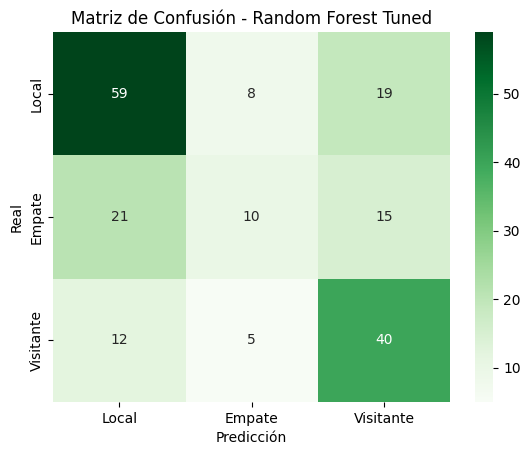

In [20]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Tuned')
plt.show()

### Satcking de Modelos

In [74]:
from sklearn.model_selection import GroupKFold

# GroupKFold para evaluar estabilidad año a año
cv_temporal = GroupKFold(n_splits=df['season_year'].nunique())

In [ ]:
'''
Buscando en internet y hablando con mi profe de ML de chat GPT
Decidimos probar con un Stackin de Modelos

'''

# STACKING DE MODELOS
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

estimadores = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

# No sé si una regresion logistica es lo mejor en este caso

modelo_stack = StackingClassifier(
    estimators=estimadores,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)


In [ ]:
# Variables para modelar
X_stack = df[features]
y_stack = df['resultado']
grupos = df['season_year']

# Métrica F1 macro (más justa con clases desbalanceadas)
f1_macro = make_scorer(f1_score, average='macro')

# Validación cruzada por temporada
scores = cross_val_score(
    modelo_stack,
    X_stack,
    y_stack,
    cv=cv_temporal.split(X_stack, y_stack, groups=grupos),
    scoring=f1_macro,
    n_jobs=-1
)

# Resultados
print("F1 Macro por temporada:", scores)
print("F1 Macro promedio:", scores.mean())
print("F1 Macro desviación estándar:", scores.std())


F1 Macro por temporada: [0.99742162 0.93374493 0.988494   0.99653236 0.99432366 0.98612355
 0.95053754 0.96913183 0.95133192 0.97855643 0.97360683 0.98234928
 0.96805602 0.97879263 0.96141767 0.96128287 0.94974697 0.96215805
 0.96751681 0.96044153 0.95096669 0.96359099 0.97985467 0.96618357]
F1 Macro promedio: 0.9696734347239485
F1 Macro desviación estándar: 0.016128586440021842


In [ ]:
# Entrenamos el modelo con todo el train
modelo_stack.fit(X_train, y_train)

# Predicciones
y_pred = modelo_stack.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Multiclase (One-vs-Rest)
y_proba = modelo_stack.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)


Accuracy: 0.5343915343915344
F1 Score (macro): 0.5031304572432885

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        86
           1       0.29      0.43      0.35        46
           2       0.66      0.37      0.47        57

    accuracy                           0.53       189
   macro avg       0.54      0.50      0.50       189
weighted avg       0.58      0.53      0.54       189

ROC AUC Score (One-vs-Rest): 0.7327827851817336


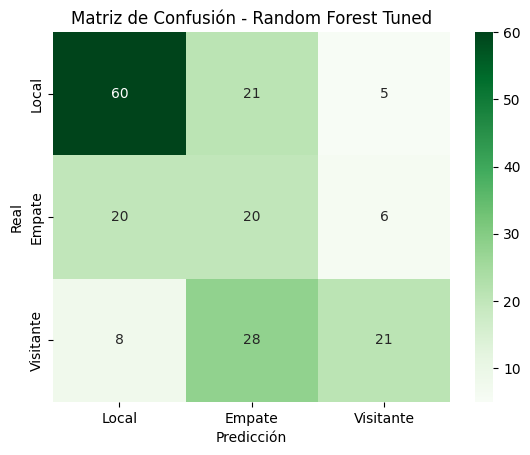

In [78]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest Tuned')
plt.show()

In [ ]:
'''
Por ultimo probamos con Hegoi hacer un train test split
Para ver si podemos identificar que pasa con el overfitting

'''
#  Dividimos el train en train/val (80/20)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

# Entrenamos modelo (Stacking)
modelo_stack.fit(X_train_split, y_train_split)

# Predicción y evaluación en val
y_val_pred = modelo_stack.predict(X_val_split)
print("Accuracy (val):", accuracy_score(y_val_split, y_val_pred))
print("F1 Score (macro - val):", f1_score(y_val_split, y_val_pred, average='macro'))
print("\nClassification Report (val):")
print(classification_report(y_val_split, y_val_pred))

# ROC AUC (Multiclase - One-vs-Rest)
y_val_proba = modelo_stack.predict_proba(X_val_split)
y_val_bin = label_binarize(y_val_split, classes=[0, 1, 2])
roc_auc_val = roc_auc_score(y_val_bin, y_val_proba, multi_class='ovr')
print("ROC AUC Score (val - One-vs-Rest):", roc_auc_val)


Accuracy (val): 0.9668539325842697
F1 Score (macro - val): 0.9632516037910411

Classification Report (val):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       818
           1       0.94      0.93      0.94       441
           2       0.98      0.97      0.98       521

    accuracy                           0.97      1780
   macro avg       0.96      0.96      0.96      1780
weighted avg       0.97      0.97      0.97      1780

ROC AUC Score (val - One-vs-Rest): 0.9978408801085129


In [ ]:
'''
Finalemente y para acabar por ahora
Hacemos con Hegoi un cross_val_score
Para corrobar como predice el modelo en el entrenamiento

Vemos que predice muy bien
Por lo cual sospechamos que el problema no esta en el modelo
Sino en los datos de Test, como vimos en los graficos
De las 2 variables mas importantes para el modelo

'''
cross_val_score(modelo_stack, X_train, y_train, cv=10,scoring= "f1_macro")

array([0.95972482, 0.96664   , 0.96922864, 0.97152187, 0.95117853,
       0.95229484, 0.95492594, 0.95660611, 0.99119579, 0.98723376])

In [25]:
import pickle

def save_model(model, path=r"C:\Users\fer_r\Desktop\ProyectosPython\BBK Bootcamps\model.pkl"):
    with open(path, "wb") as f:
        pickle.dump(model, f)
def load_model(path=r"C:\Users\fer_r\Desktop\ProyectosPython\BBK Bootcamps\Machine Learning - The Bridge\src\Model\Production\model.pkl"):
    with open(path, "rb") as f:
        return pickle.load(f)



In [24]:
save_model(mejor_rf_final)